In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/pls/ST001937/'

df = pd.read_csv('../../../data/ST001937_bm.csv')

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
import numpy as np

X = df.values
y_categorical = df['Phenotypes'].unique()
classes = df['Phenotypes']

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plot settings
cols = ['blue','orange']
mks = ['o','^']
colorlist = [cols[i-1] for i in classes]
markerlist = [mks[i-1] for i in classes]

# Making the dummy Y response matrix
y = np.zeros(shape=(df.shape[0], 2))
for i in range(df.shape[0]):
    y[i, classes[i] - 1] = 1


plsr = PLSRegression(n_components=2, scale=False) # <1>
plsr.fit(X, y)
scores = plsr.x_scores_



# PCA wants a normalized Matrix
X_p = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_p)

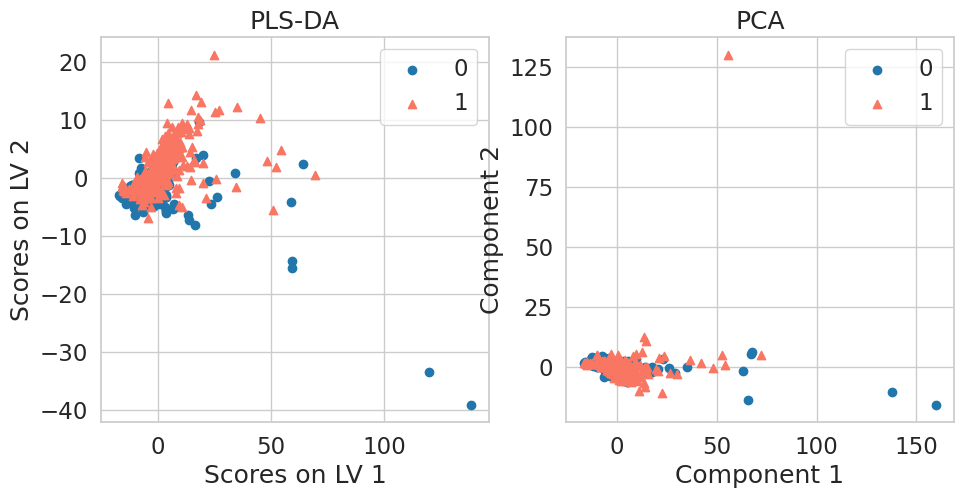

In [6]:




fig = plt.figure(figsize = (11, 5))

ax0 = fig.add_subplot(121)
for i in range(len(y_categorical)):
    indx = df.loc[df['Phenotypes'] == y_categorical[i]].index
    ax0.scatter(scores[indx,0], scores[indx,1], marker = mks[i], label = y_categorical[i])

ax0.set_xlabel('Scores on LV 1')
ax0.set_ylabel('Scores on LV 2')
ax0.set_title('PLS-DA')
ax0.legend(loc = 'upper right')

ax1 = fig.add_subplot(122)
for i in range(len(y_categorical)):
    indx = df.loc[df['Phenotypes'] == y_categorical[i]].index
    ax1.scatter(principalComponents[indx, 0], principalComponents[indx, 1], marker = mks[i], label = y_categorical[i])

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_title('PCA')
ax1.legend(loc = 'upper right')
